In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [93]:
!git clone https://github.com/yatin9988/Convolutional-Neural-Network.git

fatal: destination path 'Convolutional-Neural-Network' already exists and is not an empty directory.


In [0]:
train_generator = ImageDataGenerator(rescale=1/255)
validation_generator = ImageDataGenerator(rescale=1/255)

In [95]:
training_data = train_generator.flow_from_directory('Convolutional-Neural-Network/Pokemon_images/Train/',target_size=(100,100),class_mode='categorical',batch_size=32)
validation_data = validation_generator.flow_from_directory('Convolutional-Neural-Network/Pokemon_images/Valid/',target_size=(100,100),class_mode='categorical',batch_size=32)

Found 888 images belonging to 5 classes.
Found 75 images belonging to 5 classes.


In [96]:
training_data.class_indices

{'Bulbasaur': 0, 'Charizard': 1, 'Charmander': 2, 'Dragonair': 3, 'Pikachu': 4}

In [97]:
validation_data.class_indices

{'Bulbasaur': 0, 'Charizard': 1, 'Charmander': 2, 'Dragonair': 3, 'Pikachu': 4}

In [98]:
for count,(x,y) in enumerate(training_data):
  print(x.shape,y.shape)
  if count == 4:
    break 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)
(32, 100, 100, 3) (32, 5)


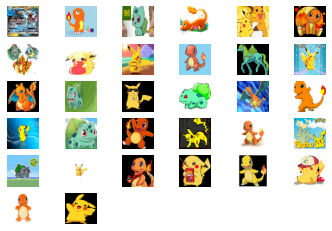

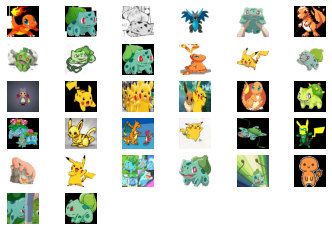

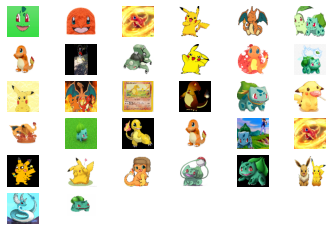

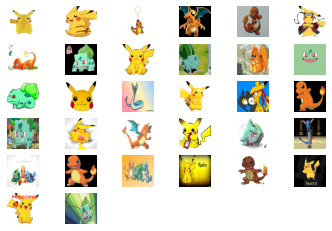

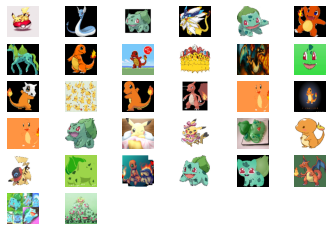

In [99]:
for count,(x,y) in enumerate(training_data):
  for i in range(x.shape[0]):
    plt.subplot(6,6,i+1)
    plt.imshow(x[i])
    plt.axis("off")
  plt.show()
  if count == 4:
    break  

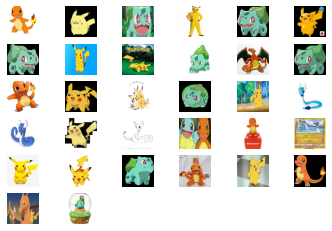

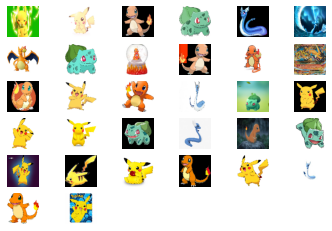

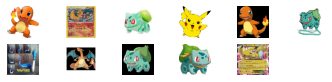

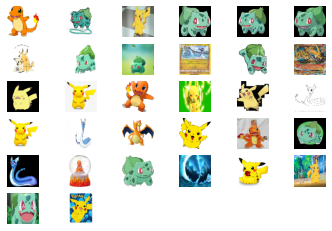

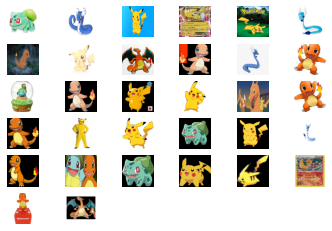

In [100]:
for count,(x,y) in enumerate(validation_data):
  for i in range(x.shape[0]):
    plt.subplot(6,6,i+1)
    plt.imshow(x[i])
    plt.axis("off")
  plt.show()

  if count == 4:
    break  

In [0]:
## model architecture

In [102]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

In [0]:
model_check_point = ModelCheckpoint('model.h5',monitor='val_accuracy',verbose=1,save_best_only=True)
early_check_point = EarlyStopping(monitor='val_accuracy',min_delta=0.5,patience=10,verbose=1,restore_best_weights=True)

In [0]:
call_backs = [model_check_point,early_check_point]

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
hist = model.fit_generator(training_data,steps_per_epoch=27,epochs=10,validation_data=validation_data,validation_steps=2)

Epoch 1/10
 3/27 [==>...........................] - ETA: 23s - loss: 0.0558 - accuracy: 0.9896

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/27 [==============================] - 18s 661ms/step - loss: 0.0763 - accuracy: 0.9734 - val_loss: 0.2790 - val_accuracy: 0.9531
Epoch 2/10
27/27 [==============================] - 18s 662ms/step - loss: 0.0884 - accuracy: 0.9682 - val_loss: 0.4216 - val_accuracy: 0.8837
Epoch 3/10
27/27 [==============================] - 17s 643ms/step - loss: 0.0772 - accuracy: 0.9696 - val_loss: 0.0037 - val_accuracy: 0.9535
Epoch 4/10
27/27 [==============================] - 18s 665ms/step - loss: 0.0942 - accuracy: 0.9591 - val_loss: 0.3634 - val_accuracy: 0.9531
Epoch 5/10
27/27 [==============================] - 18s 684ms/step - loss: 0.0826 - accuracy: 0.9696 - val_loss: 0.6631 - val_accuracy: 0.8140
Epoch 6/10
27/27 [==============================] - 17s 633ms/step - loss: 0.1199 - accuracy: 0.9533 - val_loss: 0.0298 - val_accuracy: 0.9302
Epoch 7/10
27/27 [==============================] - 19s 691ms/step - loss: 0.1102 - accuracy: 0.9556 - val_loss: 0.2578 - val_accuracy: 0.9219
Epoch 8/10